In [292]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd

In [293]:
w1x1 = []
w1x2 = []
w2x1 = []
w2x2 = []
w1 = [[0.1 ,0.83],[0.09, 0.55],[0.29, 0.35], [0.38, 0.70], [0.52, 0.48], [0.57, 0.73], [0.73, 0.75], [0.47, 0.06]]
w2 = [[0.10, 0.29], [0.08, 0.15], [0.23, 0.16], [0.70, 0.19], [0.62, 0.47], [0.91, 0.27], [0.65, 0.90], [0.75, 0.36]]
K = 2
black = np.ones(8)
red = np.zeros(8)

In [294]:
X = np.concatenate((w1, w2))

Y = np.concatenate((black, red))



In [295]:
X

array([[0.1 , 0.83],
       [0.09, 0.55],
       [0.29, 0.35],
       [0.38, 0.7 ],
       [0.52, 0.48],
       [0.57, 0.73],
       [0.73, 0.75],
       [0.47, 0.06],
       [0.1 , 0.29],
       [0.08, 0.15],
       [0.23, 0.16],
       [0.7 , 0.19],
       [0.62, 0.47],
       [0.91, 0.27],
       [0.65, 0.9 ],
       [0.75, 0.36]])

In [297]:
for i in range(7):
    w1x1.append(w1[i][0])
    w1x2.append(w1[i][1])
    w2x1.append(w2[i][0])
    w2x2.append(w2[i][1]) 

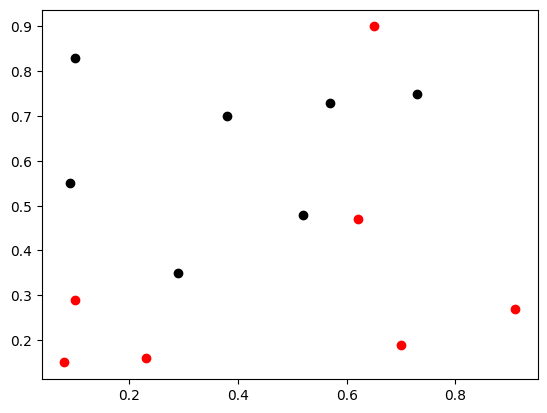

In [298]:

plt.scatter(w1x1, w1x2, c='k')
plt.scatter(w2x1, w2x2, c='r')


In [299]:
# Create Tree
def getGiniScore(X,Y,ri,ci):
    G=0
    S=X[ri,ci]
    Y0=Y[np.where(X[:,ci]<=S)]
    Y1=Y[np.where(X[:,ci]>S)]
    ep=0.00000000001
    
    for i in range(K):
        P=len(Y0[np.where(Y0==i)])/(len(Y0)+ep)
        Q=len(Y1[np.where(Y1==i)])/(len(Y1) +ep)
        G=G+(len(Y0)/len(Y))*P**2 +(len(Y1)/len(Y)) *Q**2

    return G

In [300]:
class TreeNode:
    def __init__(self,id, parent=None,vLevel=None,vSplitFeature=None,
                 vOp=None,vSplitValue=None,vSplitSign=None,vPredictedClass=None):
        self.id = id
        self.children=[]
        self.parent=parent
        self.vLevel=vLevel
        self.vSplitFeature=vSplitFeature
        self.vOp=vOp
        self.vSplitValue=vSplitValue
        self.vSplitSign=vSplitSign
        self.vPredictedClass=vPredictedClass
        if(parent!=None):
            parent.children=parent.children+[self]

In [301]:
class TreeNode:
    def __init__(self,id, parent=None,vLevel=None,vSplitFeature=None,
                 vOp=None,vSplitValue=None,vSplitSign=None,vPredictedClass=None):
        self.id = id
        self.children=[]
        self.parent=parent
        self.vLevel=vLevel
        self.vSplitFeature=vSplitFeature
        self.vOp=vOp
        self.vSplitValue=vSplitValue
        self.vSplitSign=vSplitSign
        self.vPredictedClass=vPredictedClass
        if(parent!=None):
            parent.children=parent.children+[self]

In [302]:
def getBestSplit(X,Y,ThresholdCount):
    ri=0
    ci=0  
    for i in range(K):
        if(len(Y[np.where(Y==i)])==len(Y)):
            ri=-1
            ci=-1 

    if(X.shape[0]<=ThresholdCount):
        ri=-1
        ci=-1   

    if(ri!=-1 and ci!=-1):
        G=np.zeros((X.shape))
        for ri in range(G.shape[0]):
            for ci in range(G.shape[1]):   
                G[ri,ci]=getGiniScore(X,Y,ri,ci)

        ri=np.unravel_index(np.argmax(G, axis=None), G.shape)[0]
        ci=np.unravel_index(np.argmax(G, axis=None), G.shape)[1]
    
    return ri,ci

In [303]:
def createTree(X, y,Level=1,Node=TreeNode(id="root",vPredictedClass=-1),ThresholdCount=1):
     
    ri,ci=getBestSplit(X,y,ThresholdCount)
  
    if( ri!=-1 and     ci!=-1):
        SplitFeature=ci
        SplitValue=X[ri,ci]

        #PlotTreeSplit(X,SplitFeature,SplitValue,Level)  #Plot While Training
        
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]     
       
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
       

        s0 = TreeNode(id="Level_"+str(Level)+"_Left("+"X"+str(SplitFeature)+"<"+str(round(SplitValue,1))+")", 
                      parent=Node,vLevel=Level,vSplitFeature=SplitFeature,vOp="<",vSplitValue=SplitValue,
                      vSplitSign=-1,vPredictedClass=-1)
        s1 = TreeNode(id="Level_"+str(Level)+"_Right("+"X"+str(SplitFeature)+">"+str(round(SplitValue,1))+")", 
                      parent=Node,vLevel=Level,vSplitFeature=SplitFeature,vOp=">",vSplitValue=SplitValue,
                      vSplitSign=1,vPredictedClass=-1)
        s0=createTree(X0,Y0,Level+1,s0,ThresholdCount=ThresholdCount)        
        s1=createTree(X1,Y1,Level+1,s1,ThresholdCount=ThresholdCount)

    else:
        if len(y[np.where(y==0)])<= len(y[np.where(y==1)]):
            Node.vPredictedClass=1
        else:
            Node.vPredictedClass=0
      

    return Node

In [304]:
Threshold=2
print(X.T.shape)
#Training
TrainedTree = createTree(X, Y,ThresholdCount=Threshold)

(2, 16)


In [305]:
# Prediction/Accuracy Evaluation
def predictTree(X,y,Node):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]             
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        newX1,newY1=predictTree(X0,Y0,Node.children[0])
        newX2,newY2=predictTree(X1,Y1,Node.children[1])
        newX= np.concatenate((newX1,newX2),axis=0)
        newY=np.concatenate((newY1,newY2),axis=0)
    else:
        newX=X
        for i in range(len(y)):
            y[i]=Node.vPredictedClass
        newY=y
    return newX,newY

In [306]:
# Accurracy on Training Data
def accurracy(Xy,NewXy):
    Xy=np.sort(Xy,axis=0)
    NewXy=np.sort(NewXy,axis=0)
    Y1=Xy[:,-1]
    Y2=NewXy[:,-1]
    m=np.mean(np.where(Y1==Y2,1,0))    
    return m*100

In [307]:
# Predict using Tree Created
newX,newY=predictTree(X,Y,TrainedTree)
Xy=np.column_stack((X,Y))          #Merge dataset to sort order again 
newXy=np.column_stack((newX,newY)) #Compare requires sorting as Tree shuffled the data in leaf nodes
Accuracy=accurracy(Xy,newXy)
print("Traning  accuracy(",Accuracy,"%).")

Traning  accuracy( 100.0 %).


In [308]:
# Plotting Hypothesis
def PlotTreeSplit(X,SplitFeature,SplitValue,Level): 
    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max()
    u = np.linspace(x_min, x_max, 2) 
    v = np.linspace(y_min, y_max, 2)      
    for i in range(len(v)): 
        if (SplitFeature==0):        
            u[i] = SplitValue
        else:
            v[i] = SplitValue
    plt.plot(u, v)
    plt.text(u[0],v[0],Level,rotation=90*SplitFeature )
    return


####################################################################
def PlotTree(X,y,Node):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        Level=Node.children[0].vLevel
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]     
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        PlotTreeSplit(X,SplitFeature,SplitValue,Level)
        PlotTree(X0,Y0,Node.children[0])
        PlotTree(X1,Y1,Node.children[1])
    else:
        plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],marker="+")
        plt.scatter(X[np.where(y!=1),0],X[np.where(y!=1),1],marker="o")
    return

####################################################################
def PlotPoints(X,y):
    plt.scatter(X[np.where(y==1),0],X[np.where(y==1),1],marker="+")
    plt.scatter(X[np.where(y!=1),0],X[np.where(y!=1),1],marker="o")
    return

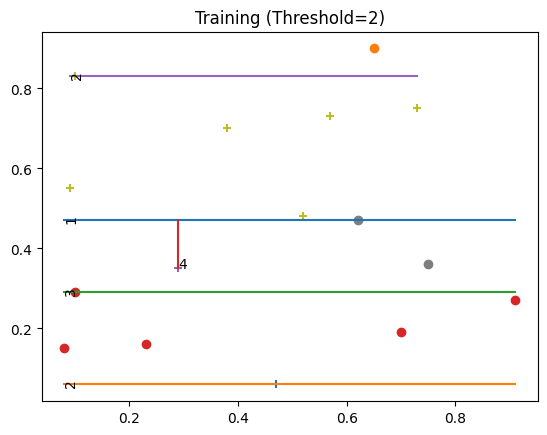

In [309]:
#%matplotlib notebook
plt.subplot(111)  
plt.title("Training (Threshold="+str(Threshold)+")")   
PlotTree(X,Y,TrainedTree)

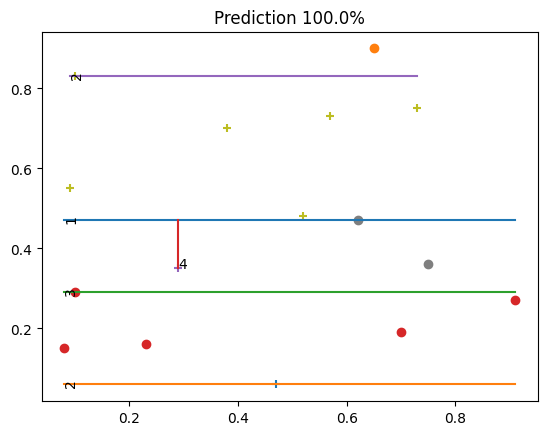

In [310]:
plt.subplot(111) 
plt.title("Prediction "+str(Accuracy)+"%")     
PlotTree(newX,newY,TrainedTree)
plt.show()

In [311]:
# Pruning a tree
def pruneTree(X,y,Node,ThresholdCount):
    if(len(Node.children)!=0):
        SplitFeature=Node.children[0].vSplitFeature
        SplitValue=Node.children[0].vSplitValue
        X0=X[np.where(X[:,SplitFeature]<=SplitValue)]
        Y0=y[np.where(X[:,SplitFeature]<=SplitValue)]             
        X1=X[np.where(X[:,SplitFeature]>SplitValue)]
        Y1=y[np.where(X[:,SplitFeature]>SplitValue)]
        if (X0.shape[0]<ThresholdCount or X1.shape[0]<ThresholdCount):
            Node.children=[]
            PredictedClass=0
            PredictedClassLen=0
            for i in range(int(y.max()+1)):
                if (len(y[np.where(y==i)])>PredictedClassLen):
                    PredictedClass=i
                    PredictedClassLen=len(y[np.where(y==i)])
            Node.vPredictedClass=PredictedClass
        else:            
            pruneTree(X0,Y0,Node.children[0],ThresholdCount)
            pruneTree(X1,Y1,Node.children[1],ThresholdCount)
                
    return Node

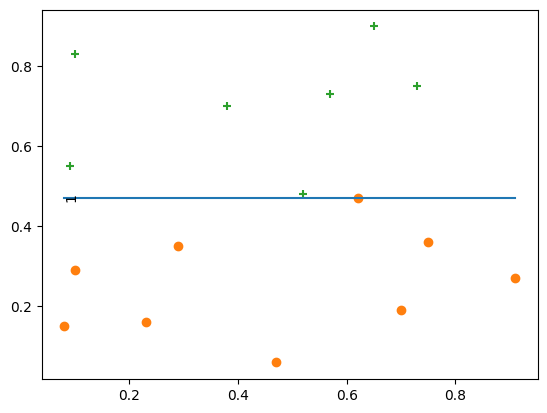

In [312]:
PrunedTree = pruneTree(X, Y, TrainedTree,ThresholdCount=Threshold)
newX,newY=predictTree(X,Y,PrunedTree)
PlotTree(newX,newY,PrunedTree)
plt.show()